In [28]:
import pandas as pd
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher, statcast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# helper function to extract mlbam key
def get_mlbam_key(last, first):
    player = playerid_lookup(last, first)
    return player["key_mlbam"].values[0]


# helper function to process statcast data
def process_statcast_data(df):
    df = df[~df["game_type"].isin(["E", "S"])]
    target_column = "pitch_type"
    feature_columns = ["release_speed", "release_spin_rate", "pfx_x", "pfx_z", "stand"]
    metadata_columns = "game_date"
    all_columns = [target_column] + feature_columns + [metadata_columns]
    df = df[all_columns]
    df["pitch_type"] = df["pitch_type"].astype("category")
    return df

In [17]:
playerid_lookup("Imanaga", "Shota")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,imanaga,shota,684007,NaN,imanash01,-1,2024.0,2024.0


In [18]:
get_mlbam_key("Imanaga", "Shota")

684007

In [19]:
imanaga_2024 = statcast_pitcher("2024-01-01", "2024-12-31", 684007)

Gathering Player Data


In [20]:
imanaga_pitches_2024 = process_statcast_data(imanaga_2024)

In [21]:
imanaga_pitches_2024

,pitch_type,release_speed,release_spin_rate,pfx_x,pfx_z,stand,game_date
0,FF,90.2,2237.0,1.15,1.50,R,2024-04-07
1,FF,90.4,2429.0,0.91,1.49,R,2024-04-07
2,FF,90.5,2386.0,0.94,1.50,R,2024-04-07
3,FF,90.7,2428.0,0.79,1.76,L,2024-04-07
4,FF,91.2,2407.0,0.85,1.69,L,2024-04-07
...,...,...,...,...,...,...,...
130,FS,84.1,1010.0,1.26,0.93,R,2024-04-01
131,FF,93.3,2505.0,0.81,1.71,R,2024-04-01
132,FF,92.7,2382.0,0.91,1.50,L,2024-04-01
133,FF,93.5,2552.0,0.69,1.42,L,2024-04-01


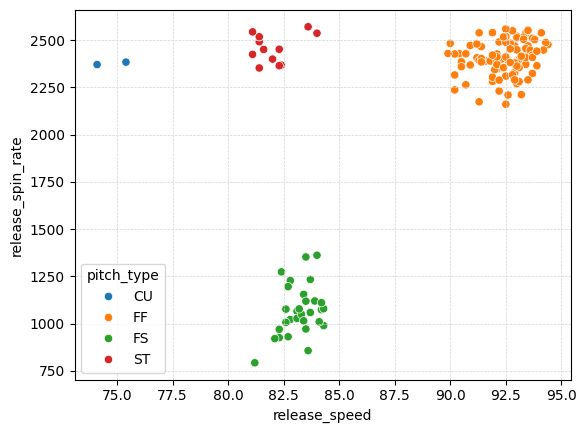

In [29]:
sns.scatterplot(data=imanaga_pitches_2024, x="release_speed", y="release_spin_rate", hue="pitch_type")
plt.grid(color="lightgrey", linestyle="--", linewidth=0.5)
plt.show()

In [23]:
imanaga_pitches_2024["pitch_type"].unique()

['FF', 'FS', 'ST', 'CU']
Categories (4, object): ['CU', 'FF', 'FS', 'ST']

In [24]:
sc_2024 = statcast("2024-01-01", "2024-12-31")

This is a large query, it may take a moment to complete


/Users/dmd/Documents/pitch-classification/.venv/lib/python3.11/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates
Skipping offseason dates


  0%|          | 0/246 [00:00<?, ?it/s]/Users/dmd/Documents/pitch-classification/.venv/lib/python3.11/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  0%|          | 1/246 [00:00<03:41,  1.11it/s]/Users/dmd/Documents/pitch-classification/.venv/lib/python3.11/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  1%|          | 2/246 [00:01<02:12,  1.85it/s]/Users/dmd/Documents/pitch-classification/.venv/lib/python3.11/site-packages/pybaseball/datahelpers/p

In [25]:
sc_2024

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2250,CH,2024-04-09,89.7,-1.81,5.71,"Iglesias, Raisel",624413,628452,strikeout,swinging_strike,...,6,5,6,5,6,Standard,Standard,240,0.078,-0.129
2306,CH,2024-04-09,89.0,-1.78,5.69,"Iglesias, Raisel",624413,628452,NaN,foul,...,6,5,6,5,6,Standard,Standard,241,0.0,0.0
2379,CH,2024-04-09,88.8,-1.79,5.64,"Iglesias, Raisel",624413,628452,NaN,swinging_strike,...,6,5,6,5,6,Standard,Standard,241,0.0,-0.083
2438,CH,2024-04-09,88.5,-1.81,5.74,"Iglesias, Raisel",624413,628452,NaN,called_strike,...,6,5,6,5,6,Standard,Standard,241,0.0,-0.024
2489,CH,2024-04-09,88.2,-1.92,5.68,"Iglesias, Raisel",624413,628452,NaN,ball,...,6,5,6,5,6,Standard,Standard,242,0.0,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,NaN,2024-03-15,<NA>,<NA>,<NA>,"Singer, Brady",666310,663903,NaN,swinging_strike,...,0,0,0,0,0,NaN,NaN,<NA>,0.0,<NA>
1834,NaN,2024-03-15,<NA>,<NA>,<NA>,"Singer, Brady",666310,663903,NaN,swinging_strike,...,0,0,0,0,0,NaN,NaN,<NA>,0.0,<NA>
1917,NaN,2024-03-15,<NA>,<NA>,<NA>,"Singer, Brady",608070,663903,double,hit_into_play,...,0,0,0,0,0,NaN,NaN,<NA>,-0.022,<NA>
1942,NaN,2024-03-15,<NA>,<NA>,<NA>,"Singer, Brady",665926,663903,field_out,hit_into_play,...,0,0,0,0,0,NaN,NaN,<NA>,0.015,<NA>


In [26]:
combo_counts = sc_2024.groupby(["pitch_name", "pitch_type"]).size().reset_index(name="counts")

print(combo_counts)

         pitch_name pitch_type  counts
0   4-Seam Fastball         FF   23201
1          Changeup         CH    7783
2         Curveball         CU    4626
3            Cutter         FC    6085
4            Eephus         EP       3
5          Forkball         FO      66
6     Knuckle Curve         KC    1037
7       Knuckleball         KN      67
8             Other         FA      34
9         Pitch Out         PO       5
10        Screwball         SC       5
11           Sinker         SI   12239
12           Slider         SL   12968
13       Slow Curve         CS       2
14           Slurve         SV     202
15     Split-Finger         FS    2059
16          Sweeper         ST    3667
